# Compte-rendu de la séance 06

## retour sur les listes

**Question de l'un de vous :** Comment manipule-t-on les matrices ?

Les matrices sont des objets mathématiques que l'on peut résumer de façon informelle en : des objets _rangés_ en ligne et colonne. Ci-dessous une représentation usuelle qu'on peut faire d'une matrice de valeurs entières :

$$m = \begin{pmatrix}
-1 & 2 & 0\\ 
 4 & 5 & 1\\ 
\end{pmatrix}$$

Pour **modéliser** cela en Python on peut se servir d'une liste de listes... cela signifie qu'on a une liste dont les éléments seront des listes :

In [1]:
m = [[-1, 2, 0], [3, 5, 1]]

Dès lors on peut accéder à l'élément qui se trouve à l'intersection d'une ligne et d'une colonne, en notation mathématique : $m_{1,2}$ est l'élément de la ligne 1 et la colonne 2 (on suppose que la numérotation commence à 0) et donc l'entier 1.

Ce qui donne avec notre variable `m` :

In [78]:
m[1][2]

1

### Création d'une matrice : attention danger !

Vous souvenez peut-être qu'on peut créer une liste de $n$ éléments en initialisant avec une valeur commune. Par exemple :

In [2]:
ma_liste = [0] * 3

`ma_liste` contient 3 références vers le même objet 0. 

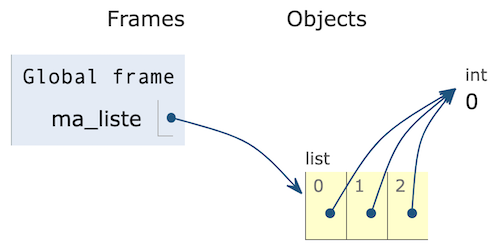

Ici le fait que les 3 références de ma liste pointent vers un unique objet n'est pas gênant car l'objet en question est **non mutable**. Donc modifier la valeur associée à l'une des références n'a pas d'impact sur les autres :

In [3]:
ma_liste[0] = 10

In [4]:
ma_liste

[10, 0, 0]

Par contre si les objets sont des listes c'est problématique : voyez ce qu'il se passe sur cet exemple dans Python tutor : [visualiser l'exemple dans pythontutor](https://pythontutor.com/visualize.html#code=matrice%20%3D%20%5B%5B0%5D%20*%203%5D%20*%202%0Amatrice%5B0%5D%5B0%5D%20%3D%2010&cumulative=false&curInstr=1&heapPrimitives=true&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [5]:
matrice = [[0] * 3] * 2

`matrice` est une structure _bancale_ : nous n'avons pas 2 lignes mais bien un unique objet liste de 3 zéros référencée 2 fois : par `matrice[0]` et `matrice[1]`. Du coup :

In [7]:
matrice[0][0] = 10

In [8]:
matrice

[[10, 0, 0], [10, 0, 0]]

Ce problème se retrouve dans la copie d'une matrice : `matrice.copy()` ne suffit pas. Il faut descendre d'un niveau :

In [2]:
def copie_mat(m):
    return [ligne.copy() for ligne in m]

In [3]:
m2 = copie_mat(m)

In [4]:
m2

[[-1, 2, 0], [3, 5, 1]]

In [6]:
m[0][1] = -2

In [7]:
m2

[[-1, 2, 0], [3, 5, 1]]

In [8]:
m

[[-1, -2, 0], [3, 5, 1]]

Et si la structure comporte des listes de listes de listes... etc. on doit passer par la fonction `deepcopy()` du module `copy` :

In [9]:
import copy

In [11]:
m3 = copy.deepcopy(m)

In [12]:
m3

[[-1, -2, 0], [3, 5, 1]]

## Les dictionnaires et les ensembles

Ce sont les objets `dict` et `set` de Python. Des structures très puissantes qu'il faut savoir utiliser.

A la question **qu'est-ce que c'est un dictionnaire pour vous ?**. Vous êtes plusieurs à répondre des _clés_ et des _valeurs_. Le lien avec les séquence ?

L'un de vous répond : 

> Au lieu d'indexer les éléments par des entiers on a des clés

C'est bien ça. Le principe reste similaire : on souhaite indexer c'est-à-dire _numéroter_ au sens large, des objets. Dans une séquence cette indexation est faite par les entiers consécutifs 0, 1, ... dans un dictionnaire le programmeur choisit ses propres index qui ne sont donc pas forcément des entiers. 

### Création d'un dictionnaire

In [9]:
d = {'seb':38, 'anna':55}

L'opérateur `[ ]` permet d'obtenir la valeur quand on a l'index ie la clé :

In [10]:
d['seb']

38

**Notons** que cette valeur est **une référence** vers l'objet et que le dictionnaire étant un objet **mutable**, on peut changer cette valeur c'est-à-dire qu'on peut référencer un autre objet :

In [11]:
d['seb'] = 51

In [12]:
d

{'seb': 51, 'anna': 55}

On peut aussi rajouter une clé et une valeur associée :

In [14]:
d['elsa'] = 55

In [15]:
d

{'seb': 51, 'anna': 55, 'elsa': 55}

**Un dictionnaire vide**

In [19]:
d2 = {}

que l'on remplit ensuite :

In [20]:
for cle in ('lundi', 'mardi', 'mercredi'):
    d2[cle] = len(cle)

In [21]:
d2

{'lundi': 5, 'mardi': 5, 'mercredi': 8}

**La fonction `dict`**

In [16]:
d3 = dict([('lundi', 5), ('mardi', 5), ('mercredi', 8)])

In [17]:
d3

{'lundi': 5, 'mardi': 5, 'mercredi': 8}

Attention si on met plusieurs fois la même clé, c'est la dernière qui compte :

In [18]:
d4 = dict([('lundi', 5), ('mardi', 5), ('lundi', 8)])

In [19]:
d4

{'lundi': 8, 'mardi': 5}

**Contruction en compréhension**

In [20]:
d5 = {jour:len(jour) for jour in ('lundi', 'mardi', 'mercredi')}

In [21]:
d5

{'lundi': 5, 'mardi': 5, 'mercredi': 8}

### Le `set` : un dictionnaire sans valeurs

Nous reviendrons plus tard sur cette structure qui est vraiment l'équivalent mathématique. Pas de doublons, opérations ensemblistes d'union (`|`), d'intersection (`&`) et différence (`-`) etc.

In [4]:
s = {3, 5, 10}

Ajoute d'un élément déjà présent :

In [28]:
s.add(3)

Ne provoque pas d'erreur, ne fait rien :

In [29]:
s

{3, 5, 10}

In [30]:
s1 = {1, 2, 3}

In [37]:
s2 = s | s1

## Parcours, test d'appartenance...

Les dictionnaires et les ensembles sont basés sur une fonction de _hachage_ qui est une fonction qui a un objet associe une valeur (qui sera la référence vers un autre objet, ou le même dans le cas des `set`). Cette fonction garantie : un calcul rapide et que deux éléments distincts sont envoyés sur deux valeurs distinctes.

C'est cette fonction de hachage qui impose la contrainte sur les clés : les clés d'un dictionnaire doivent être des objets qu'on peut donner à une fonction de hachage on dit _hashable_  en anglais. Pour **simplifier** on retiendra que pour nous les clés sont des objets **non mutables** : `str`, `int`, `float`, `bool` et `tuple`.

Le fait qu'une clé appartient à la table de hachage calculée par notre fonction de hachage, en clair le fait qu'une clé est présente ou non dans notre dictionnaire est une opération constante. Conséquence bénéfique : le test d'appartenance pour un dictionnaire et ensemble est optimisé :

In [22]:
def f(struct, elt):
    """fonction qui renvoie True si elt appartient à la structure struct"""
    return elt in struct

On crée une liste de 10 millions d'éléments :

In [33]:
L = list(range(10000000))

Et un ensemble de 10 millions d'éléments :

In [34]:
S = set(range(10000000))

On estime le temps pris pour trouver que -1 ne fait pas partie de la liste `L` :

In [35]:
%timeit f(L, -1)

110 ms ± 555 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


À comparer avec celui de l'ensemble :

In [36]:
%timeit f(S, -1)

115 ns ± 5.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


On constate qu'avec l'ensemble c'est 1 000 000 de fois plus rapide !

#### Parcourir...

Encore notre toute puissante boucle `for` :

In [38]:
s2

{1, 2, 3, 5, 10}

In [39]:
for e in s2:
    print(e)

1
2
3
5
10


Prcourir un dictionnaire c'est avant tout parcourir ses clés :

In [42]:
d

{'anna': 55, 'elsa': 55, 'seb': 51}

In [43]:
for k in d:
    print(k)

seb
anna
elsa


Mais si on veut parcourir les valeurs, c'est possible grâce à la méthode `values()` :

In [44]:
for v in d.values():
    print(v)

51
55
55


Et on peut même parcourir les couples des clés et valeurs en utilisant la boucle `for` avec la méthode `items()` :

In [45]:
for k, v in d.items():
    print(k, v)

seb 51
anna 55
elsa 55


**On supposera toujours que les clés d'un dictionnaire ne sont pas triées**. Même depuis la version 3.7 Python garde les clés dans l'ordre dans lequel elles ont été créées. Il arrive qu'on ait besoin des clés dans un ordre précis :

In [46]:
cles_ordonnees = sorted(d)

In [47]:
cles_ordonnees

['anna', 'elsa', 'seb']

**Méthode avancée** : obtenir un tri suivant son propre critère :

In [64]:
couples_ordonnes = sorted(d.items(), key=lambda e: e[1])

In [65]:
couples_ordonnes

[('seb', 51), ('elsa', 52), ('anna', 55)]

**Supprimer une clé** 

In [ ]:
v = d.pop('seb')

On peut aussi utiliser l'instruction `del` qui supprime une référence (`del` peut être utilisée avec n'importe qu'elle référence)... mais je déconseille son utilisation. Privilégiez `pop`.

In [ ]:
del d['seb']

**Supprimer un élément dans un ensemble**

On pourra utiliser `remove` **si on sait que l'élément est présent** (sinon la méthode provoque une erreur) ou alors `discard` qui réalise un test d'appartenance avant, la méthode est donc plus _safe_ mais plus coûteuse.

In [5]:
s

{3, 5, 10}

In [6]:
s.remove(3)

In [7]:
s

{5, 10}

In [8]:
s.remove(1)

KeyError: 1

**Notez** le `KeyError` qui montre qu'un `set` fonctionne un peu comme un dictionnaire : les éléments sont des clés.

In [9]:
s.discard(1)

**Autre motivation pour le choix d'un dictionnaire**

On a donc notre dictionnaire de prénoms associés à un entier :

In [23]:
prenoms = {'seb':51, 'anna':55}

Qu'on aurait pu modéliser autrement :

In [24]:
l_prenoms = [('seb', 51), ('anna', 55)]

Mais comment tester par exemple que `'thierry'` appartient ou pas à nos données ?

In [25]:
'thierry' in l_prenoms

False

Mais...

In [26]:
l_prenoms2 = [('seb', 51), ('anna', 55), ('thierry', 53)]

In [27]:
'thierry' in l_prenoms2

False

Le dictionnaire est la structure qu'il nous fait ici :

In [28]:
'thierry' in prenoms

False

Mais...

In [29]:
prenoms2 = {'seb':51, 'anna':55, 'thierry':53}

In [30]:
'thierry' in prenoms2

True

Pour finir, un même dictionnaire peut mélanger des clés de différentes nature même si en pratique on aura souvent des clés de type `str` et `tuple` le plus souvent :

In [77]:
{'num':'41008899', (0, 0):True, 1:[0, 1]}

{(0, 0): True, 1: [0, 1], 'num': '41008899'}